# Simulate the striatum example network

This example continues ```striatum_example.ipynb``` and shows how to setup input and run the simulation.

### Simulation duration and number of cores

You can change the duration of the simulation, and the number of cores. If you run on EBRAINS the memory available is severly limited, and the number of cores need to be reduced to 3 which increases runtime.

In [1]:
duration = 3.5
n_cores = 6

%matplotlib inline

## Setup the input

Here we use the file ```input_config/striatum-test-input.json```.

The input can be generated in serial or in parallel. To generate it in parallel, pass ```rc``` parameter as in the previous examples.


In [2]:
import os
from snudda.input import SnuddaInput

network_path = os.path.join("networks", "striatum_example")
rc = None

si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("input_config","striatum-test-input.json"),
                 verbose=False, rc=rc)
si.generate()

Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/striatum_example/network-config.json
Loading 50 neurons with 1764 synapses and 0 gap junctions
Writing spikes to networks/striatum_example/input-spikes.hdf5


## Plot synaptic input

Loading 50 neurons with 1764 synapses and 0 gap junctions


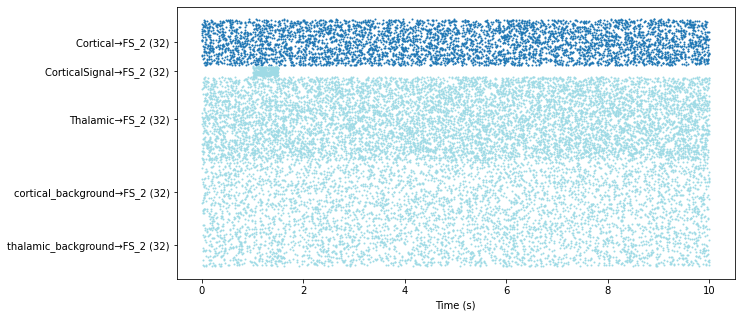

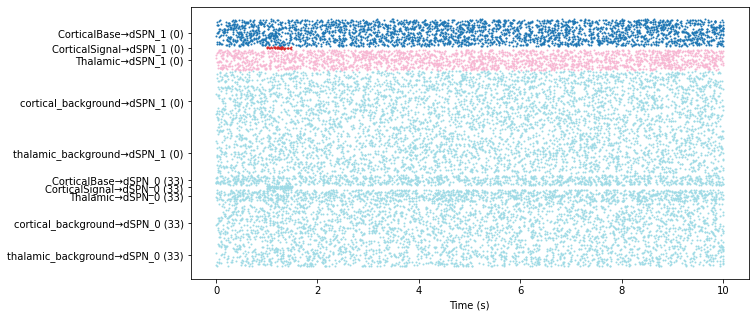

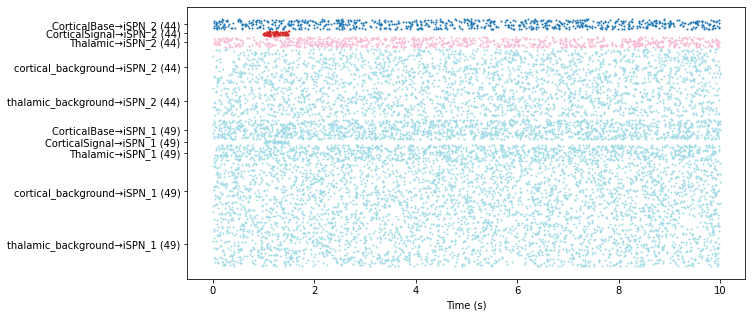

In [3]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_path=network_path)
spi.plot_input(neuron_type="FS", num_neurons=3)
spi.plot_input(neuron_type="dSPN", num_neurons=2)
spi.plot_input(neuron_type="iSPN", num_neurons=2)

## Run the neuron simulation

Here we run the network for 3.5 seconds.

In [4]:
os.system(f"mpiexec -n {n_cores} snudda simulate {network_path} --time {duration}")

numprocs=6
Using input file networks/striatum_example/input-spikes.hdf5
Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/striatum_example/network-config.json
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64, aarch64, arm64 directories (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', path='networks/striatum_example', network_file=None, input_file=None, output_file=None, time=3.5, snudda_data=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=False, disable_gj=False, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None)
Using input file networks/striatum_example/input-spikes.hdf5
Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/striatum_example/network-config.json
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_6

/home/hjorth/.local/lib/python3.9/site-packages/bluepyopt/ephys/simulators.py:83: UserWarning: Unable to find Neuron hoc shared library in /usr/local/lib/python/neuron, not disabling banner
  warnings.warn('Unable to find Neuron hoc shared library in %s, '
/home/hjorth/.local/lib/python3.9/site-packages/bluepyopt/ephys/simulators.py:83: UserWarning: Unable to find Neuron hoc shared library in /usr/local/lib/python/neuron, not disabling banner
  warnings.warn('Unable to find Neuron hoc shared library in %s, '
/home/hjorth/.local/lib/python3.9/site-packages/bluepyopt/ephys/simulators.py:83: UserWarning: Unable to find Neuron hoc shared library in /usr/local/lib/python/neuron, not disabling banner
  warnings.warn('Unable to find Neuron hoc shared library in %s, '
/home/hjorth/.local/lib/python3.9/site-packages/bluepyopt/ephys/simulators.py:83: UserWarning: Unable to find Neuron hoc shared library in /usr/local/lib/python/neuron, not disabling banner
  warnings.warn('Unable to find Neuron 

Added 0.0 gap junctions to simulation (0 total)
Added 1764 synapses to simulation (1764 total)
Running simulation for 3500.0 ms.
Running simulation for 3500.0 ms.
Running simulation for 3500.0 ms.
Running simulation for 3500.0 ms.
Running simulation for 3500.0 ms.
Running simulation for 3500.0 ms.
Running simulation for 3.5 s
Running simulation for 3.5 s
Running simulation for 3.5 s
Running simulation for 3.5 s
Running simulation for 3.5 s
Running simulation for 3.5 s
Running Neuron simulator 3500 ms, with dt=0.025
Running Neuron simulator 3500 ms, with dt=0.025
Running Neuron simulator 3500 ms, with dt=0.025
Running Neuron simulator 3500 ms, with dt=0.025
Running Neuron simulator 3500 ms, with dt=0.025
Running Neuron simulator 3500 ms, with dt=0.025
1% done. Elapsed: 8.4 s, estimated time left: 827.9 s
14% done. Elapsed: 115.4 s, estimated time left: 708.6 s
27% done. Elapsed: 223.5 s, estimated time left: 604.1 s
39% done. Elapsed: 327.5 s, estimated time left: 512.2 s
51% done. Elap

0

## Plotting

In [5]:
from snudda.utils import SnuddaLoad
from snudda.utils import SnuddaLoadNetworkSimulation

sl = SnuddaLoad(network_path)

sim_file = os.path.join(network_path, "simulation", "output.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")

sls = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file)

Loading 50 neurons with 1764 synapses and 0 gap junctions
Loading networks/striatum_example/simulation/output.hdf5


### Plot voltage traces

Loading network info from networks/striatum_example/network-synapses.hdf5
Loading 50 neurons with 1764 synapses and 0 gap junctions
Loading input info from networks/striatum_example/input-spikes.hdf5
Loading networks/striatum_example/simulation/output.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Plotted 50 traces (total 50)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/striatum_example/figures/Network-voltage-trace--iSPN-dSPN-ChIN-FS.pdf


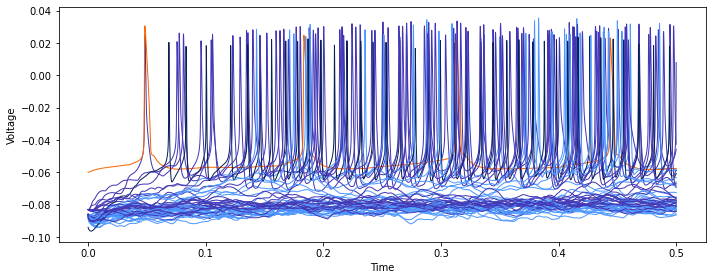

In [6]:
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file=sim_file, network_file=network_file)
# Use trace_id to specify which traces
ax = pt.plot_traces(offset=0, time_range=(0,0.5),fig_size=(10,4))

### Spike raster plot

Saving figure to networks/striatum_example/figures/spike-raster.png


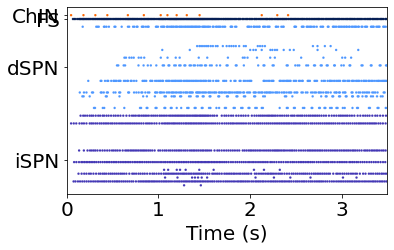

In [7]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path,
                             network_file=network_file,
                             simulation_file=sim_file,
                             snudda_load=sl, snudda_simulation_load=sls)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

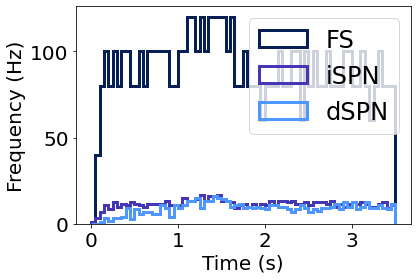

<AxesSubplot:xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram_type(neuron_type=["dSPN", "iSPN", "FS"])